In [67]:
# from graphviz import Graph
from graphviz import Digraph
import xml.etree.ElementTree as ET
import json
import re

svg_extension = 'svg'
dot = '.'
file_path = './'
file_name = 'sample-graph-read'
g = Digraph(
    format=svg_extension,
    engine='dot'
)
# g.attr(
#     'node',
#     shape='box',
#     color='blue',
#     style='rounded'
# )

# ellipse: start, end
# box: 処理
# diamond: if分岐
# parallelogram: ?
g.node('start', shape="box", style='rounded', id='start')
g.node('end', shape="box", style='rounded', id="end")
# g.node('start', shape="ellipse")
# g.node('end', shape="ellipse")
g.node('if_valid', shape="diamond", id='if_valid')
g.node('message', shape="parallelogram", id="message")
g.node('input', shape="parallelogram", id="input")

g.edge('start', 'input', id='start-input')
g.edge('input', 'if_valid', id='input-if_valid')
g.edge('if_valid', 'message', label='no', id='if_valid-message')
g.edge('if_valid', 'end', label='yes', id='if_valid-end')
g.edge('message', 'input', id='message-input')

output_file_path = file_path + file_name
g.render(output_file_path, view=False)

def find_str_re(target_str, regrex=r'[A-Z]'):
    re_search = re.search(regrex, target_str)
    find_re_search_str = None
    re_search_str = None
    if re_search is not None:
        re_search_str = re_search[0]
        find_re_search_str = target_str.find(re_search_str)
    return [re_search_str, find_re_search_str]


def get_json_structure(svg_json, loop_object, replace_str='', children_str='children', type_str='type', attr_str='attr', text_str='text', cnt=0, translates=None):
    for obj_idx, obj in enumerate(loop_object):
        obj_name = obj.tag.replace(replace_str, '')
        obj_attr = obj.attrib
        obj_text = obj.text if obj.text is not None else ''
        if cnt == 0:
            print(obj_name, obj_attr)
            transform = obj_attr['transform']
            s_transform = transform.split(' translate')
            translates = [int(x) for x in s_transform[-1].replace('(', '').replace(')', '').split(' ')]
            s_transform = s_transform[:-1]
            transform = s_transform[0]
            print(transform, translates)
            obj_attr['transform'] = transform
        else:
            if obj_name == 'polygon':
                # print(cnt)
                points = obj_attr['points']
                # print(points)
                s_points = []
                for xy in points.split(' '):
                    [x, y] = [float(a) for a in xy.split(',')]
                    x += translates[0]
                    y += translates[1]
                    # s_points.append(','.join[str(xy) for xy in [x, y]])
                    s_points.append(str(x) + ',' + str(y))
                # s_points = [[[float(x + translates[0]), float(y + translates[1])] for [x, y] in xy.split(',')] for xy in points.split(' ')]
                # print(s_points)
                # print(' '.join(s_points))
                # points = ' '.join([','.join([str(xy) for [x, y] in s_points]) for s_points])
                obj_attr['points'] = ' '.join(s_points)
            elif obj_name == 'path':
                d = obj_attr['d']

                s_d = d.split(',')
                for t_s_d_idx in range(0, len(s_d)):
                    t_s_d = s_d[t_s_d_idx]
                    t_s_d_s = t_s_d.split(' ')
                    for t_s_d_s_idx in range(0, len(t_s_d_s)):
                        a = t_s_d_s[t_s_d_s_idx]
                        [find_a_str, find_a] = find_str_re(a)
                        if find_a_str is not None:
                            if find_a > 0:
                                t_s_d_s[t_s_d_s_idx] = a[:find_a -1] + ' ' + a[find_a:]
                    s_d[t_s_d_idx] = ' '.join(t_s_d_s)
                # d = ','.join(s_d)
                obj_attr['d'] = ','.join(s_d)
                d = obj_attr['d']
                s_ds = d.split(' ')
                for s_d_idx in range(0, len(s_ds)):
                    s_d = s_ds[s_d_idx]
                    [find_s_d_str, find_s_d] = find_str_re(s_d)
                    if find_s_d is not None and find_s_d == 0:
                        [s_d_x, s_d_y] = [float(x) for x in s_d.replace(find_s_d_str, '').split(',')]
                        
                        s_ds[s_d_idx] = find_s_d_str + str(s_d_x + translates[0]) + ',' + str(s_d_y + translates[1])
                    # print('\t'*cnt, s_d)
                obj_attr['d'] = ' '.join(s_ds)
                # print('\t'*cnt, obj_attr['d'])
            # else:
                # print('\t'*cnt, obj_name, obj_attr, obj.text)
#                 for x in dir(obj):
#                     print('\t'*cnt, x)
        svg_json[obj_idx] = {
            type_str: obj_name,
            attr_str: obj_attr,
            text_str: obj_text,
            children_str: {}
        }
        # print(svg_json)
        svg_json[obj_idx][children_str] = get_json_structure(svg_json[obj_idx][children_str], obj, replace_str=replace_str, cnt=(cnt+1), translates=translates)
    return svg_json


tree = ET.parse(output_file_path + dot + svg_extension)
root = tree.getroot()
root_tag = root.tag[:-3]

svg_json = {}
svg_json = get_json_structure(svg_json, root, replace_str=root_tag)

# Serializing json  
json_object = json.dumps(svg_json, indent = 4)
  
# Writing to sample.json 
json_extension = 'json'
with open(output_file_path + dot + json_extension, "w") as outfile:
    outfile.write(json_object)

g {'id': 'graph0', 'class': 'graph', 'transform': 'scale(1 1) rotate(0) translate(4 273)'}
scale(1 1) rotate(0) [4, 273]


In [68]:
svg_json

{0: {'type': 'g',
  'attr': {'id': 'graph0',
   'class': 'graph',
   'transform': 'scale(1 1) rotate(0)'},
  'text': '\n',
  'children': {0: {'type': 'title', 'attr': {}, 'text': '%3', 'children': {}},
   1: {'type': 'polygon',
    'attr': {'fill': 'white',
     'stroke': 'none',
     'points': '0.0,277.0 0.0,0.0 203.299,0.0 203.299,277.0 0.0,277.0'},
    'text': '',
    'children': {}},
   2: {'type': 'g',
    'attr': {'id': 'start', 'class': 'node'},
    'text': '',
    'children': {0: {'type': 'title',
      'attr': {},
      'text': 'start',
      'children': {}},
     1: {'type': 'path',
      'attr': {'fill': 'none',
       'stroke': 'black',
       'd': 'M105.988,247.0 C105.988,4.0 71.9881,-269 71.9881,-269 65.9881,-269 59.9881,-263 59.9881,-257 59.9881,-257 59.9881,-245 59.9881,-245 59.9881,-239 65.9881,-233 71.9881,-233 71.9881,-233 101.988,-233 101.988,-233 107.988,-233 113.988,-239 113.988,-245 113.988,-245 113.988,-257 113.988,-257 113.988,-263 107.988,-269 101.988,-269'},


In [72]:
# from graphviz import Graph
from graphviz import Digraph
import xml.etree.ElementTree as ET
import json

svg_extension = 'svg'
dot = '.'
file_path = './'
file_name = 'sample-graph-read'
g = Digraph(
    format=svg_extension,
    engine='dot'
)
# g.attr(
#     'node',
#     shape='box',
#     color='blue',
#     style='rounded'
# )

# ellipse: start, end
# box: 処理
# diamond: if分岐
# parallelogram: ?
# g.node('start', shape="box", style='rounded', id='start')
# g.node('end', shape="box", style='rounded', id="end")
g.node('start', shape="box", id='start')
g.node('end', shape="box", id="end")
# g.node('start', shape="ellipse")
# g.node('end', shape="ellipse")
g.node('if_valid', shape="diamond", id='if_valid')
g.node('message', shape="parallelogram", id="message")
g.node('input', shape="parallelogram", id="input")

g.edge('start', 'input', id='start-input')
g.edge('input', 'if_valid', id='input-if_valid')
g.edge('if_valid', 'message', label='no', id='if_valid-message')
g.edge('if_valid', 'end', label='yes', id='if_valid-end')
g.edge('message', 'input', id='message-input')

output_file_path = file_path + file_name
g.render(output_file_path, view=False)

def get_json_structure(svg_json, loop_object, replace_str='', children_str='children', type_str='type', attr_str='attr', text_str='text'):
    for obj_idx, obj in enumerate(loop_object):
        obj_name = obj.tag.replace(replace_str, '')
        obj_attr = obj.attrib
        obj_text = obj.text if obj.text is not None else ''
        svg_json[obj_idx] = {
            type_str: obj_name,
            attr_str: obj_attr,
            text_str: obj_text,
            children_str: {}
        }
        # print(svg_json)
        svg_json[obj_idx][children_str] = get_json_structure(svg_json[obj_idx][children_str], obj, replace_str=replace_str)
    return svg_json


tree = ET.parse(output_file_path + dot + svg_extension)
root = tree.getroot()
root_tag = root.tag[:-3]

svg_json = {}
svg_json = get_json_structure(svg_json, root, replace_str=root_tag)

# Serializing json  
json_object = json.dumps(svg_json, indent = 4)
  
# Writing to sample.json 
json_extension = 'json'
with open(output_file_path + dot + json_extension, "w") as outfile:
    outfile.write(json_object)

In [73]:
svg_json

{0: {'type': 'g',
  'attr': {'id': 'graph0',
   'class': 'graph',
   'transform': 'scale(1 1) rotate(0) translate(4 273)'},
  'text': '\n',
  'children': {0: {'type': 'title', 'attr': {}, 'text': '%3', 'children': {}},
   1: {'type': 'polygon',
    'attr': {'fill': 'white',
     'stroke': 'none',
     'points': '-4,4 -4,-273 199.299,-273 199.299,4 -4,4'},
    'text': '',
    'children': {}},
   2: {'type': 'g',
    'attr': {'id': 'start', 'class': 'node'},
    'text': '',
    'children': {0: {'type': 'title',
      'attr': {},
      'text': 'start',
      'children': {}},
     1: {'type': 'polygon',
      'attr': {'fill': 'none',
       'stroke': 'black',
       'points': '113.988,-269 59.9881,-269 59.9881,-233 113.988,-233 113.988,-269'},
      'text': '',
      'children': {}},
     2: {'type': 'text',
      'attr': {'text-anchor': 'middle',
       'x': '86.9881',
       'y': '-247.3',
       'font-family': 'Times New Roman,serif',
       'font-size': '14.00'},
      'text': 'start',

In [75]:
from graphviz import Source
print(output_file_path)
source_from_file = Source.from_file(output_file_path)

./sample-graph-read


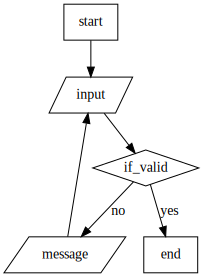

In [76]:
source_from_file

In [77]:
dir(source_from_file)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_default_extension',
 '_encoding',
 '_engine',
 '_format',
 '_kwargs',
 '_repr_svg_',
 '_view',
 '_view_darwin',
 '_view_freebsd',
 '_view_linux',
 '_view_windows',
 'copy',
 'directory',
 'encoding',
 'engine',
 'filename',
 'filepath',
 'format',
 'from_file',
 'pipe',
 'render',
 'save',
 'source',
 'view']

In [80]:
print(source_from_file.source)

digraph {
	start [id=start shape=box]
	end [id=end shape=box]
	if_valid [id=if_valid shape=diamond]
	message [id=message shape=parallelogram]
	input [id=input shape=parallelogram]
	start -> input [id="start-input"]
	input -> if_valid [id="input-if_valid"]
	if_valid -> message [label=no id="if_valid-message"]
	if_valid -> end [label=yes id="if_valid-end"]
	message -> input [id="message-input"]
}



In [81]:
# from graphviz import Graph
from graphviz import Digraph
import xml.etree.ElementTree as ET
import json

svg_extension = 'svg'
dot = '.'
file_path = './'
file_name = 'sample-graph-read'
g = Digraph(
    format=svg_extension,
    engine='dot'
)

# ellipse: start, end
# box: 処理
# diamond: if分岐
# parallelogram: ?
# g.node('start', shape="box", style='rounded', id='start')
# g.node('end', shape="box", style='rounded', id="end")
g.node('start', shape="box", id='start')
g.node('end', shape="box", id="end")
# g.node('start', shape="ellipse")
# g.node('end', shape="ellipse")
g.node('if_valid', shape="diamond", id='if_valid')
g.node('message', shape="parallelogram", id="message")
g.node('input', shape="parallelogram", id="input")

g.edge('start', 'input', id='start-input')
g.edge('input', 'if_valid', id='input-if_valid')
g.edge('if_valid', 'message', label='no', id='if_valid-message')
g.edge('if_valid', 'end', label='yes', id='if_valid-end')
g.edge('message', 'input', id='message-input')

output_file_path = file_path + file_name

In [89]:
split_g = g.source.split('\n')
g_dict = {}
for s_g_idx, s_g in enumerate(split_g):
    print(s_g_idx, s_g)
    g_dict[s_g_idx] = s_g.replace('\t', '')

0 digraph {
1 	start [id=start shape=box]
2 	end [id=end shape=box]
3 	if_valid [id=if_valid shape=diamond]
4 	message [id=message shape=parallelogram]
5 	input [id=input shape=parallelogram]
6 	start -> input [id="start-input"]
7 	input -> if_valid [id="input-if_valid"]
8 	if_valid -> message [label=no id="if_valid-message"]
9 	if_valid -> end [label=yes id="if_valid-end"]
10 	message -> input [id="message-input"]
11 }


In [90]:
g_dict

{0: 'digraph {',
 1: 'start [id=start shape=box]',
 2: 'end [id=end shape=box]',
 3: 'if_valid [id=if_valid shape=diamond]',
 4: 'message [id=message shape=parallelogram]',
 5: 'input [id=input shape=parallelogram]',
 6: 'start -> input [id="start-input"]',
 7: 'input -> if_valid [id="input-if_valid"]',
 8: 'if_valid -> message [label=no id="if_valid-message"]',
 9: 'if_valid -> end [label=yes id="if_valid-end"]',
 10: 'message -> input [id="message-input"]',
 11: '}'}

In [93]:
import json
with open("./../../flowchart/src/assets/json/sample.json", "w") as outfile: 
    outfile.write(json.dumps(g_dict)) 

In [97]:
g_dict = {}
ary = [
    'digraph G {',
    '	subgraph cluster_0 {',
    '		style=filled;',
    '		color=lightgrey;',
    '		node [style=filled,color=white];',
    '		a0 -> a1 -> a2 -> a3;',
    '		label = "process #1";',
    '	}',
    '	subgraph cluster_1 {',
    '		node [style=filled];',
    '		b0 -> b1 -> b2 -> b3;',
    '		label = "process #2";',
    '		color=blue',
    '	}',
    '	start -> a0;',
    '	start -> b0;',
    '	a1 -> b3;',
    '	b2 -> a3;',
    '	a3 -> a0;',
    '	a3 -> end;',
    '	b3 -> end;',
    '	start [shape=Mdiamond];',
    '	end [shape=Msquare];',
    '}'
]
for idx in range(0, len(ary)):
    # print(idx, ary[idx])
    g_dict[idx] = ary[idx]
with open("./../../flowchart/src/assets/json/sample.json", "w") as outfile: 
    outfile.write(json.dumps(g_dict)) 

In [100]:
# from graphviz import Graph
from graphviz import Digraph
import xml.etree.ElementTree as ET
import json

svg_extension = 'svg'
dot = '.'
file_path = './'
file_name = 'sample-graph-read'
g = Digraph(
    format=svg_extension,
    engine='dot'
)
# g.attr(
#     'node',
#     shape='box',
#     color='blue',
#     style='rounded'
# )

# ellipse: start, end
# box: 処理
# diamond: if分岐
# parallelogram: ?
# g.node('start', shape="box", style='rounded', id='start')
# g.node('end', shape="box", style='rounded', id="end")
# shape_name = 'box'
shape_name = 'rect'
g.node('start', shape=shape_name, id='start')
g.node('end', shape=shape_name, id="end")

# shape_name = 'diamond'
g.node('if_valid', shape=shape_name, id='if_valid')

# shape_name = 'parallelogram'
g.node('message', shape=shape_name, id="message")
g.node('input', shape=shape_name, id="input")

g.edge('start', 'input', id='start-input')
g.edge('input', 'if_valid', id='input-if_valid')
g.edge('if_valid', 'message', label='no', id='if_valid-message')
g.edge('if_valid', 'end', label='yes', id='if_valid-end')
g.edge('message', 'input', id='message-input')

output_file_path = file_path + file_name
g.render(output_file_path, view=False)

def get_json_structure(svg_json, loop_object, replace_str='', children_str='children', type_str='type', attr_str='attr', text_str='text'):
    for obj_idx, obj in enumerate(loop_object):
        obj_name = obj.tag.replace(replace_str, '')
        obj_attr = obj.attrib
        obj_text = obj.text if obj.text is not None else ''
        svg_json[obj_idx] = {
            type_str: obj_name,
            attr_str: obj_attr,
            text_str: obj_text,
            children_str: {}
        }
        # print(svg_json)
        svg_json[obj_idx][children_str] = get_json_structure(svg_json[obj_idx][children_str], obj, replace_str=replace_str)
    return svg_json


tree = ET.parse(output_file_path + dot + svg_extension)
root = tree.getroot()
root_tag = root.tag[:-3]

svg_json = {}
svg_json = get_json_structure(svg_json, root, replace_str=root_tag)

# Serializing json  
json_object = json.dumps(svg_json, indent = 4)
  
# Writing to sample.json 
json_extension = 'json'
with open(output_file_path + dot + json_extension, "w") as outfile:
    outfile.write(json_object)

In [101]:
svg_json

{0: {'type': 'g',
  'attr': {'id': 'graph0',
   'class': 'graph',
   'transform': 'scale(1 1) rotate(0) translate(4 273)'},
  'text': '\n',
  'children': {0: {'type': 'title', 'attr': {}, 'text': '%3', 'children': {}},
   1: {'type': 'polygon',
    'attr': {'fill': 'white',
     'stroke': 'none',
     'points': '-4,4 -4,-273 140,-273 140,4 -4,4'},
    'text': '',
    'children': {}},
   2: {'type': 'g',
    'attr': {'id': 'start', 'class': 'node'},
    'text': '',
    'children': {0: {'type': 'title',
      'attr': {},
      'text': 'start',
      'children': {}},
     1: {'type': 'polygon',
      'attr': {'fill': 'none',
       'stroke': 'black',
       'points': '79,-269 25,-269 25,-233 79,-233 79,-269'},
      'text': '',
      'children': {}},
     2: {'type': 'text',
      'attr': {'text-anchor': 'middle',
       'x': '52',
       'y': '-247.3',
       'font-family': 'Times New Roman,serif',
       'font-size': '14.00'},
      'text': 'start',
      'children': {}}}},
   3: {'type